In [80]:
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Data Preparation

In [42]:
img_height, img_width = (224,224)
batch_size = 32

train_data_dir = "star_wars_images_processed/train"
valid_data_dir = "star_wars_images_processed/val"
test_data_dir = "star_wars_images_processed/test"


In [47]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.4)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')  

valid_generator = train_datagen.flow_from_directory(
    valid_data_dir, 
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')  



Found 1674 images belonging to 50 classes.
Found 341 images belonging to 50 classes.


In [48]:
test_generator = train_datagen.flow_from_directory(
    test_data_dir, 
    target_size=(img_height, img_width),
    batch_size=1,
    class_mode='categorical',
    subset='validation')  

Found 368 images belonging to 50 classes.


In [98]:
class_names = list(train_generator.class_indices.keys())
class_names

['Admiral Ackbar',
 'Admiral Piett',
 'Anakin Skywalker',
 'BB-8',
 'Bail Organa',
 'Bib Fortuna',
 'Boba Fett',
 'Bodhi Rook',
 'C-3PO',
 'Captain Phasma',
 'Cassian Andor',
 'Chewbacca',
 'Dark Sidious',
 'Darth Maul',
 'Darth Vader',
 'Finn (FN-2187)',
 'General Grievous',
 'General Hux',
 'Grand Moff Tarkin',
 'Greedo',
 'Han Solo',
 'Jabba the Hutt',
 'Jango Fett',
 'Jar Jar Binks',
 'Jyn Erso',
 'K-2SO',
 'Kenobi',
 'Kylo Ren',
 'Lando Calrissian',
 'Luke Skywalker',
 'Mace Windu',
 'Maz Kanata',
 'Nien Nunb',
 'Obi-Wan',
 'Orson Krennic',
 'Padm├⌐ Amidala',
 'Poe Dameron',
 'Princess Leia Organa',
 "Qi'ra",
 'Qui-Gon Jinn',
 'R2-D2',
 'Rose Tico',
 'Saw Gerrera',
 'Supreme Leader Snoke',
 'Tobias Beckett',
 'Vice-Admiral Holdo',
 'Watto',
 'Wedge Antilles',
 'Wicket W. Warrick',
 'Yoda']

# Model Training

In [66]:
resnet_model = Sequential()

base_model = ResNet50(include_top=False, weights='imagenet',pooling= "avg",classes = "50",input_shape=(224,224,3))

for layer in base_model.layers:
    layer.trainable = False

resnet_model.add(base_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(50, activation='softmax'))


In [69]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [70]:
epochs=10
history = resnet_model.fit(
  train_generator,
  validation_data=valid_generator,
  epochs=epochs
)

Epoch 1/10


c:\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


53/53 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - accuracy: 0.1660 - loss: 3.6373 - val_accuracy: 0.5484 - val_loss: 1.7841
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.6781 - loss: 1.2078 - val_accuracy: 0.6745 - val_loss: 1.1966
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.8255 - loss: 0.6487 - val_accuracy: 0.7155 - val_loss: 1.1364
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.8933 - loss: 0.4173 - val_accuracy: 0.7566 - val_loss: 0.9019
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 0.9170 - loss: 0.3056 - val_accuracy: 0.7654 - val_loss: 0.8642
Epoch 6/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.9542 - loss: 0.1939 - val_accuracy: 0.7713 - val_loss: 0.8608
Epoch 7/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.9537 - loss: 0.1597 - val_accuracy: 0.7771 - val_loss: 0.9671
Epoch 8/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.9616 - loss: 0.1461 - val_accuracy: 0.7801 - val_loss: 0.8561
Epo

# Model Evaluation

In [71]:
resnet_model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 2048)           │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 50)             │        25,650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,811,928 (102.28 MB)

 Trainable params: 1,074,738 (4.10 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

 Optimizer params: 2,149,478 (8.20 MB)

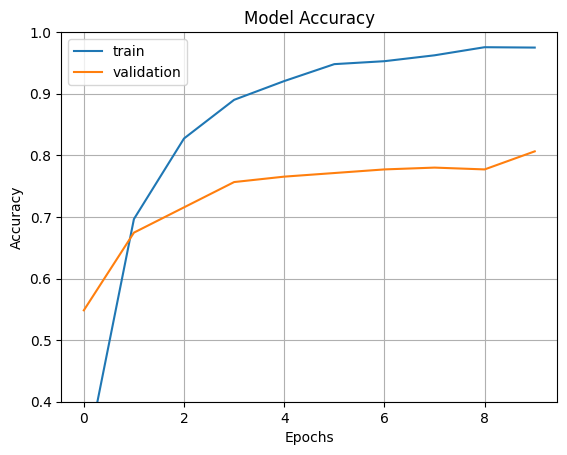

In [72]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()
     

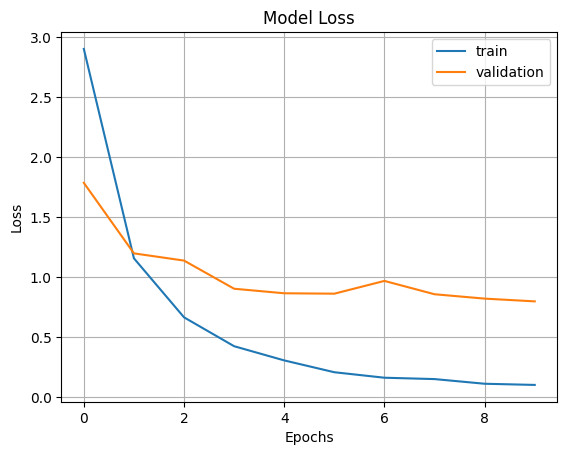

In [73]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [79]:
resnet_model.save('resnet50_starwars.keras')

In [76]:
test_loss, test_acc = resnet_model.evaluate(test_generator,verbose=2)
print('\nTest accuracy:', test_acc)

c:\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


368/368 - 14s - 37ms/step - accuracy: 0.7717 - loss: 0.8587

Test accuracy: 0.77173912525177


# Model Prediction

In [106]:
image=cv2.imread("kylotest.jpg")
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)

(1, 224, 224, 3)


In [107]:
pred=resnet_model.predict(image)
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
The predicted class is Kylo Ren
